Mounted at /content/gdrive/


[dataset](https://www.kaggle.com/datasets/mafaisal007/predicting-rise-and-fall-in-crypto-based-on-tweets/data)

In [ ]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from collections import Counter
from nltk.classify.scikitlearn import SklearnClassifier
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import ttest_ind


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
!kaggle datasets download -d kaushiksuresh147/bitcoin-tweets
!unzip /content/gdrive/MyDrive/crypto/bitcoin-tweets.zip -d /content/gdrive/MyDrive/crypto/bitcoin-tweets


Dataset URL: https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets
License(s): CC0-1.0
100% 693M/695M [00:07<00:00, 102MB/s]
100% 695M/695M [00:07<00:00, 104MB/s]
unzip:  cannot find or open /content/gdrive/MyDrive/crypto/bitcoin-tweets.zip, /content/gdrive/MyDrive/crypto/bitcoin-tweets.zip.zip or /content/gdrive/MyDrive/crypto/bitcoin-tweets.zip.ZIP.


In [ ]:
df = pd.read_csv('Bitcoin_tweets.csv', index_col = 0)

<ipython-input-8-1bea27181646>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/MyDrive/Bitcoin_tweets.csv')


In [ ]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95762463,TAnotepad,Not financial advice,#Bitcoin | Forever Alone Crypto Trader 😭 | Ana...,2022-11-04 10:18:11,674.0,1789.0,27466.0,False,2023-01-06 17:46:35,"Bitcoin squeeze is SUPER TIGHT, which way will...","['BTC', 'bitcoin', 'Crypto', 'cryptocurrency',...",Twitter for Android,False
95762464,Boba-Feh,South of the North Pole,My backpack has jets. Reformed Necromonger,2008-04-02 21:48:47,79.0,454.0,125.0,False,2023-01-06 17:46:29,Closed #BTC short at 16725. Missed my long pla...,['BTC'],Twitter for Android,False
95762465,Ethereum Yoda,NaN,UP or DOWN...\n.\n.\n.\n.\nPrice matters NOT.,2022-07-24 04:50:18,532.0,1.0,0.0,False,2023-01-06 17:46:22,#Ethereum price update: \n\n#ETH $1263.59 USD\...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...",Twitter Web App,False
95762466,Bitcoin Price Ticker,NaN,Tweets the current price of #bitcoin every 5 m...,2022-10-20 07:10:38,83.0,7.0,9.0,False,2023-01-06 17:46:20,1₿ = $16814.7 -0.07%🔻\n\nDetails:\nChange: 🔻-1...,"['bitcoin', 'btc']",BitcoinLivePriceTicker,False


In [ ]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [ ]:
df['hashtags'].unique()

array(["['bitcoin']", "['Thursday', 'Btc', 'wallet', 'security']", nan,
       ...,
       "['DogelonMars', 'TSUKA', 'SHIB', 'SAFEMOON', 'hokkaido', 'FEGtoken', 'Saitama', 'BTC', 'ETH']",
       "['BTC', 'bitcoin', 'Crypto', 'cryptocurrency', 'ETH', 'SOL']",
       "['faucet', 'cointiply', 'BTC']"], dtype=object)

In [ ]:
df['#bitcoin'] = df['hashtags'].str.contains('Bitcoin')|df['hashtags'].str.contains('BTC')
df = df[df['#bitcoin']]

In [ ]:
df.columns

Index(['user_name', 'user_location', 'user_created', 'user_followers',
       'user_friends', 'user_verified', 'date', 'text', 'hashtags', 'source',
       'is_retweet', '#bitcoin'],
      dtype='object')

In [ ]:

df = df[['user_name', 'user_location', 'date', 'text', 'hashtags', 'is_retweet']]
df

,user_name,user_location,date,text,hashtags,is_retweet
3,Crypto is the future,NaN,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],False
6,Bitcoin-Bot,"Florida, USA",2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",False
8,Mikcoin,NaN,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",False
10,@massumeh18 #RefinedWarrior #Activist,NOVA,2021-02-10 23:52:04,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",False
...,...,...,...,...,...,...
95762462,Behzad.moni,NaN,2023-01-06 17:46:36,#DogelonMars is the future. #TSUKA is the nex...,"['DogelonMars', 'TSUKA', 'SHIB', 'SAFEMOON', '...",False
95762463,TAnotepad,Not financial advice,2023-01-06 17:46:35,"Bitcoin squeeze is SUPER TIGHT, which way will...","['BTC', 'bitcoin', 'Crypto', 'cryptocurrency',...",False
95762464,Boba-Feh,South of the North Pole,2023-01-06 17:46:29,Closed #BTC short at 16725. Missed my long pla...,['BTC'],False
95762465,Ethereum Yoda,NaN,2023-01-06 17:46:22,#Ethereum price update: \n\n#ETH $1263.59 USD\...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...",False


In [ ]:
def extractFeaturesFromText(text):
    features = {}
    compoundScores = []
    positiveScores = []
    negativeScores = []
    neutralScores = []

    for sentence in nltk.sent_tokenize(text):
        pop = sia.polarity_scores(sentence)
        compoundScores.append(pop["compound"])
        positiveScores.append(pop["pos"])
        negativeScores.append(pop["neg"])
        neutralScores.append(pop["neu"])

    features["meanCompoundScore"] = sum(compoundScores) / len(compoundScores)
    features["meanPositiveScore"] = sum(positiveScores) / len(positiveScores)
    features["meanNegativeScore"] = sum(negativeScores) / len(negativeScores)
    features["meanNeutralScore"] = sum(neutralScores) / len(neutralScores)

    return features

In [ ]:
def getSentimentScores(sentence):
    if isinstance(sentence, str):
        scores = sia.polarity_scores(sentence)
        return scores
    else:
        return None

In [ ]:
df['sentimentScores'] = df['text'].apply(getSentimentScores)


<ipython-input-19-f95672b47140>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimentScores'] = df['text'].apply(getSentimentScores)


In [ ]:
df

,user_name,user_location,date,text,hashtags,is_retweet,sentimentScores
3,Crypto is the future,NaN,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",False,"{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou..."
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],False,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp..."
6,Bitcoin-Bot,"Florida, USA",2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,Mikcoin,NaN,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
10,@massumeh18 #RefinedWarrior #Activist,NOVA,2021-02-10 23:52:04,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...
95762462,Behzad.moni,NaN,2023-01-06 17:46:36,#DogelonMars is the future. #TSUKA is the nex...,"['DogelonMars', 'TSUKA', 'SHIB', 'SAFEMOON', '...",False,"{'neg': 0.063, 'neu': 0.846, 'pos': 0.091, 'co..."
95762463,TAnotepad,Not financial advice,2023-01-06 17:46:35,"Bitcoin squeeze is SUPER TIGHT, which way will...","['BTC', 'bitcoin', 'Crypto', 'cryptocurrency',...",False,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp..."
95762464,Boba-Feh,South of the North Pole,2023-01-06 17:46:29,Closed #BTC short at 16725. Missed my long pla...,['BTC'],False,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp..."
95762465,Ethereum Yoda,NaN,2023-01-06 17:46:22,#Ethereum price update: \n\n#ETH $1263.59 USD\...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
df.iloc[0]['sentimentScores'].get('neu')

0.84

In [ ]:
df['positiveScore'] = df['sentimentScores'].apply(lambda x: x['pos'] if x is not None else None)
df['negativeScore'] = df['sentimentScores'].apply(lambda x: x['neg'] if x is not None else None)
df['neutralScore'] = df['sentimentScores'].apply(lambda x: x['neu'] if x is not None else None)
df['compoundScore'] = df['sentimentScores'].apply(lambda x: x['compound'] if x is not None else None)


<ipython-input-22-a46560476ef0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positiveScore'] = df['sentimentScores'].apply(lambda x: x['pos'] if x is not None else None)
<ipython-input-22-a46560476ef0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['negativeScore'] = df['sentimentScores'].apply(lambda x: x['neg'] if x is not None else None)
<ipython-input-22-a46560476ef0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
df.to_csv('cryptoSentiment.csv')


adds timestamp

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dfSentiment = pd.read_csv('cryptoSentiment.csv', index_col = 0)

In [ ]:
dfSentiment.rename(columns={'user_name':'username', 'user_location':'location',
                  }, inplace=True)


In [ ]:
dfSentiment

,username,location,date,text,hashtags,is_retweet,sentimentScores,positiveScore,negativeScore,neutralScore,compoundScore
3,Crypto is the future,NaN,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",False,"{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...",0.160,0.000,0.840,0.3164
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],False,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.109,0.000,0.891,0.4019
6,Bitcoin-Bot,"Florida, USA",2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
8,Mikcoin,NaN,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
10,@massumeh18 #RefinedWarrior #Activist,NOVA,2021-02-10 23:52:04,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
95762462,Behzad.moni,NaN,2023-01-06 17:46:36,#DogelonMars is the future. #TSUKA is the nex...,"['DogelonMars', 'TSUKA', 'SHIB', 'SAFEMOON', '...",False,"{'neg': 0.063, 'neu': 0.846, 'pos': 0.091, 'co...",0.091,0.063,0.846,0.3182
95762463,TAnotepad,Not financial advice,2023-01-06 17:46:35,"Bitcoin squeeze is SUPER TIGHT, which way will...","['BTC', 'bitcoin', 'Crypto', 'cryptocurrency',...",False,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.196,0.000,0.804,0.6841
95762464,Boba-Feh,South of the North Pole,2023-01-06 17:46:29,Closed #BTC short at 16725. Missed my long pla...,['BTC'],False,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",0.000,0.091,0.909,-0.2960
95762465,Ethereum Yoda,NaN,2023-01-06 17:46:22,#Ethereum price update: \n\n#ETH $1263.59 USD\...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


In [ ]:
len(dfSentiment)

3310426

In [ ]:
import time
import datetime

from datetime import datetime


In [ ]:
timestamp = []

for date in range(len(dfSentiment)):
  stamp = datetime.strptime(dfSentiment.iloc[date]['date'], "%Y-%m-%d %H:%M:%S")
  timestamp.append(stamp)

In [ ]:
timestamp

[datetime.datetime(2021, 2, 10, 23, 54, 33),
 datetime.datetime(2021, 2, 10, 23, 54, 6),
 datetime.datetime(2021, 2, 10, 23, 53, 17),
 datetime.datetime(2021, 2, 10, 23, 52, 25),
 datetime.datetime(2021, 2, 10, 23, 52, 4),
 datetime.datetime(2021, 2, 10, 23, 50, 30),
 datetime.datetime(2021, 2, 10, 23, 50, 2),
 datetime.datetime(2021, 2, 10, 23, 48, 38),
 datetime.datetime(2021, 2, 10, 23, 48, 37),
 datetime.datetime(2021, 2, 10, 23, 47, 32),
 datetime.datetime(2021, 2, 10, 23, 47, 13),
 datetime.datetime(2021, 2, 10, 23, 46, 39),
 datetime.datetime(2021, 2, 10, 23, 45, 3),
 datetime.datetime(2021, 2, 10, 23, 44, 57),
 datetime.datetime(2021, 2, 10, 23, 44, 43),
 datetime.datetime(2021, 2, 10, 23, 42, 49),
 datetime.datetime(2021, 2, 10, 23, 40, 48),
 datetime.datetime(2021, 2, 10, 23, 40, 36),
 datetime.datetime(2021, 2, 10, 23, 40, 21),
 datetime.datetime(2021, 2, 10, 23, 39, 47),
 datetime.datetime(2021, 2, 10, 23, 39, 26),
 datetime.datetime(2021, 2, 10, 23, 36, 52),
 datetime.date

In [ ]:
dfSentiment['timestamp'] = timestamp

In [ ]:
dfSentiment

,username,location,date,text,hashtags,is_retweet,sentimentScores,positiveScore,negativeScore,neutralScore,compoundScore,timestamp
3,Crypto is the future,NaN,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",False,"{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...",0.160,0.000,0.840,0.3164,2021-02-10 23:54:33
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],False,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.109,0.000,0.891,0.4019,2021-02-10 23:54:06
6,Bitcoin-Bot,"Florida, USA",2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2021-02-10 23:53:17
8,Mikcoin,NaN,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2021-02-10 23:52:25
10,@massumeh18 #RefinedWarrior #Activist,NOVA,2021-02-10 23:52:04,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2021-02-10 23:52:04
...,...,...,...,...,...,...,...,...,...,...,...,...
95762462,Behzad.moni,NaN,2023-01-06 17:46:36,#DogelonMars is the future. #TSUKA is the nex...,"['DogelonMars', 'TSUKA', 'SHIB', 'SAFEMOON', '...",False,"{'neg': 0.063, 'neu': 0.846, 'pos': 0.091, 'co...",0.091,0.063,0.846,0.3182,2023-01-06 17:46:36
95762463,TAnotepad,Not financial advice,2023-01-06 17:46:35,"Bitcoin squeeze is SUPER TIGHT, which way will...","['BTC', 'bitcoin', 'Crypto', 'cryptocurrency',...",False,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.196,0.000,0.804,0.6841,2023-01-06 17:46:35
95762464,Boba-Feh,South of the North Pole,2023-01-06 17:46:29,Closed #BTC short at 16725. Missed my long pla...,['BTC'],False,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",0.000,0.091,0.909,-0.2960,2023-01-06 17:46:29
95762465,Ethereum Yoda,NaN,2023-01-06 17:46:22,#Ethereum price update: \n\n#ETH $1263.59 USD\...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2023-01-06 17:46:22


In [ ]:
dfSentiment.to_csv('cleanSentiment.csv', index=False)


In [ ]:
## CLEAN DATA

#START HERE

In [ ]:
from google.colab import drive
gdrive_dir = '/content/gdrive/'
drive.mount(gdrive_dir, force_remount=True)

Mounted at /content/gdrive/


## Aggregate Data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('cleanSentiment.csv', index_col = 0)

In [ ]:
df

,location,date,text,hashtags,is_retweet,sentimentScores,positiveScore,negativeScore,neutralScore,compoundScore,timestamp
username,,,,,,,,,,,
Crypto is the future,NaN,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",False,"{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...",0.160,0.000,0.840,0.3164,2021-02-10 23:54:33
Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],False,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.109,0.000,0.891,0.4019,2021-02-10 23:54:06
Bitcoin-Bot,"Florida, USA",2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2021-02-10 23:53:17
Mikcoin,NaN,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2021-02-10 23:52:25
@massumeh18 #RefinedWarrior #Activist,NOVA,2021-02-10 23:52:04,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2021-02-10 23:52:04
...,...,...,...,...,...,...,...,...,...,...,...
Behzad.moni,NaN,2023-01-06 17:46:36,#DogelonMars is the future. #TSUKA is the nex...,"['DogelonMars', 'TSUKA', 'SHIB', 'SAFEMOON', '...",False,"{'neg': 0.063, 'neu': 0.846, 'pos': 0.091, 'co...",0.091,0.063,0.846,0.3182,2023-01-06 17:46:36
TAnotepad,Not financial advice,2023-01-06 17:46:35,"Bitcoin squeeze is SUPER TIGHT, which way will...","['BTC', 'bitcoin', 'Crypto', 'cryptocurrency',...",False,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.196,0.000,0.804,0.6841,2023-01-06 17:46:35
Boba-Feh,South of the North Pole,2023-01-06 17:46:29,Closed #BTC short at 16725. Missed my long pla...,['BTC'],False,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",0.000,0.091,0.909,-0.2960,2023-01-06 17:46:29


In [ ]:
dates = []

for date in df['date']:
  d = date.split(' ')[0]
  dates.append(d)


In [ ]:
df['tweetDate'] = dates

In [ ]:
df

,location,date,text,hashtags,is_retweet,sentimentScores,positiveScore,negativeScore,neutralScore,compoundScore,timestamp,tweetDate
username,,,,,,,,,,,,
Crypto is the future,NaN,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",False,"{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...",0.160,0.000,0.840,0.3164,2021-02-10 23:54:33,2021-02-10
Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],False,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.109,0.000,0.891,0.4019,2021-02-10 23:54:06,2021-02-10
Bitcoin-Bot,"Florida, USA",2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2021-02-10 23:53:17,2021-02-10
Mikcoin,NaN,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2021-02-10 23:52:25,2021-02-10
@massumeh18 #RefinedWarrior #Activist,NOVA,2021-02-10 23:52:04,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,2021-02-10 23:52:04,2021-02-10
...,...,...,...,...,...,...,...,...,...,...,...,...
Behzad.moni,NaN,2023-01-06 17:46:36,#DogelonMars is the future. #TSUKA is the nex...,"['DogelonMars', 'TSUKA', 'SHIB', 'SAFEMOON', '...",False,"{'neg': 0.063, 'neu': 0.846, 'pos': 0.091, 'co...",0.091,0.063,0.846,0.3182,2023-01-06 17:46:36,2023-01-06
TAnotepad,Not financial advice,2023-01-06 17:46:35,"Bitcoin squeeze is SUPER TIGHT, which way will...","['BTC', 'bitcoin', 'Crypto', 'cryptocurrency',...",False,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.196,0.000,0.804,0.6841,2023-01-06 17:46:35,2023-01-06
Boba-Feh,South of the North Pole,2023-01-06 17:46:29,Closed #BTC short at 16725. Missed my long pla...,['BTC'],False,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",0.000,0.091,0.909,-0.2960,2023-01-06 17:46:29,2023-01-06


In [ ]:
df['tweetDate'].unique()

array(['2021-02-10', '2021-02-09', '2021-02-08', '2021-02-07',
       '2021-02-06', '2021-02-05', '2021-02-15', '2021-02-14',
       '2021-02-13', '2021-02-19', '2021-02-18', '2021-02-22',
       '2021-02-28', '2021-03-12', '2021-03-11', '2021-04-12',
       '2021-04-11', '2021-04-10', '2021-04-09', '2021-04-08',
       '2021-04-07', '2021-04-06', '2021-04-05', '2021-04-24',
       '2021-04-23', '2021-04-22', '2021-04-21', '2021-04-20',
       '2021-04-19', '2021-04-18', '2021-04-17', '2021-05-29',
       '2021-05-28', '2021-05-27', '2021-05-26', '2021-05-25',
       '2021-06-23', '2021-06-22', '2021-06-21', '2021-06-20',
       '2021-07-05', '2021-07-04', '2021-07-03', '2021-07-02',
       '2021-07-23', '2021-07-21', '2021-07-19', '2021-07-24',
       '2021-07-22', '2021-07-20', '2021-07-18', '2021-07-17',
       '2021-07-30', '2021-07-29', '2021-07-28', '2021-07-27',
       '2021-07-26', '2021-07-25', '2021-08-09', '2021-08-08',
       '2021-08-07', '2021-08-06', '2021-08-05', '2021-

In [ ]:
avg_df = df.groupby('tweetDate').agg({'compoundScore': 'mean', 'text': 'count', 'negativeScore':'mean', 'positiveScore': 'mean', 'neutralScore':'mean'})

In [ ]:
avg_df.reset_index(inplace=True)
avg_df.rename(columns={'text': 'count'}, inplace=True)
avg_df

,tweetDate,compoundScore,count,negativeScore,positiveScore,neutralScore
0,2021-02-05,0.103567,772,0.030500,0.071929,0.897578
1,2021-02-06,0.110918,1488,0.026290,0.071880,0.901828
2,2021-02-07,0.115992,1169,0.024441,0.071811,0.903743
3,2021-02-08,0.138868,3180,0.023406,0.081950,0.894644
4,2021-02-09,0.119698,2102,0.025271,0.073755,0.900970
...,...,...,...,...,...,...
216,2022-12-27,0.175156,13640,0.026069,0.078869,0.895062
217,2023-01-06,0.206539,3165,0.022792,0.080418,0.896790
218,2023-01-07,0.155540,15662,0.029332,0.076448,0.894221
219,2023-01-08,0.158096,3085,0.023812,0.065601,0.910587


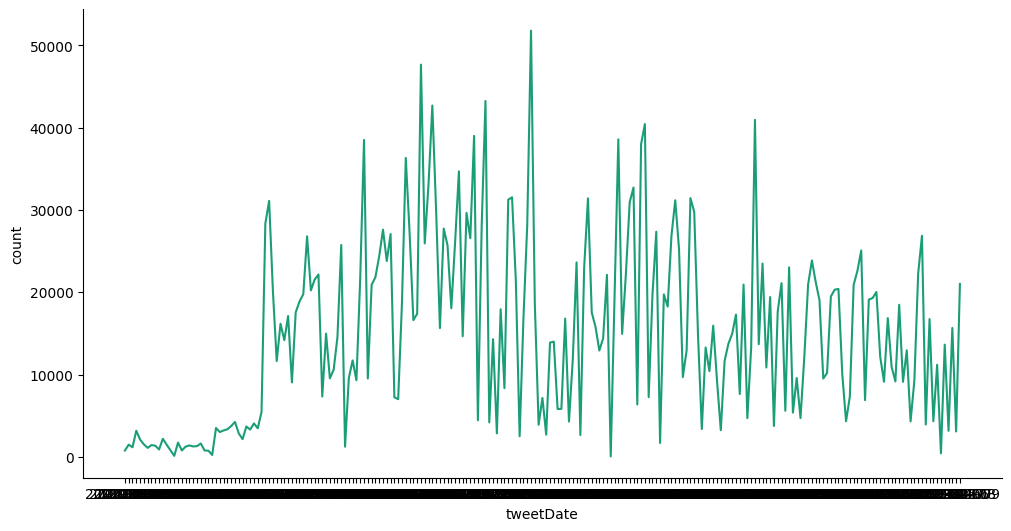

In [ ]:
# @title tweetDate vs count

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tweetDate']
  ys = series['count']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = avg_df.sort_values('tweetDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tweetDate')
_ = plt.ylabel('count')

In [ ]:
avg_df.to_csv('avgSentiment.csv', index=False)

<Axes: xlabel='tweetDate'>

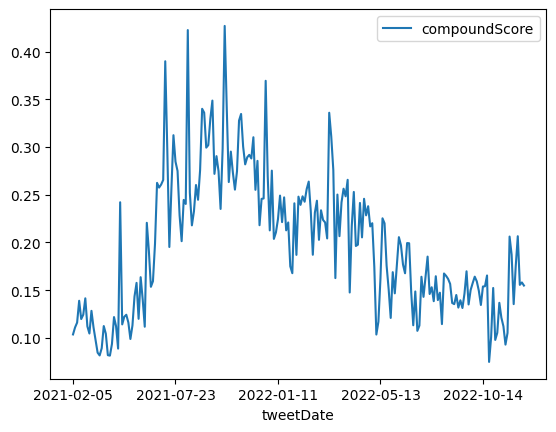

In [ ]:
avg_df.plot(x='tweetDate', y='compoundScore')

<Axes: xlabel='tweetDate'>

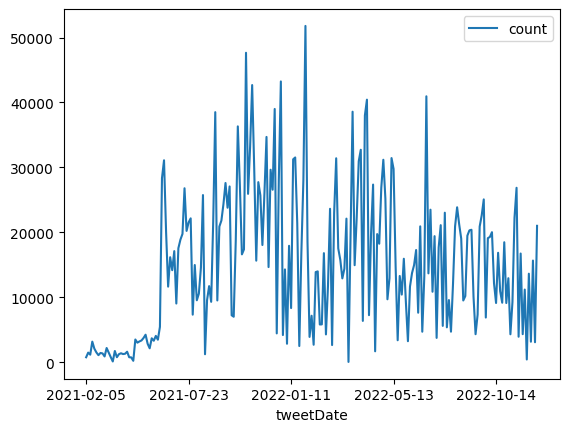

In [ ]:
avg_df.plot(x='tweetDate', y='count')

# Interpolation

In [ ]:
avg_df = pd.read_csv('avgSentiment.csv')
avg_df.sort_values('tweetDate', inplace=True)
avg_df.tweetDate = pd.to_datetime(avg_df.tweetDate)
avg_df.tweetDate = avg_df.tweetDate.dt.strftime('%Y-%m-%d')
avg_df['tweetDate']

0      2021-02-05
1      2021-02-06
2      2021-02-07
3      2021-02-08
4      2021-02-09
          ...    
216    2022-12-27
217    2023-01-06
218    2023-01-07
219    2023-01-08
220    2023-01-09
Name: tweetDate, Length: 221, dtype: object

In [ ]:
avg_df.sort_values('tweetDate', inplace=True)
new_df = pd.DataFrame()
new_df['tweetDate'] = pd.date_range(start='02/05/2021', end='01/09/2023')
new_df['tweetDate'] = new_df['tweetDate'].dt.strftime('%Y-%m-%d')
new_df['count'] = new_df['tweetDate'].map(avg_df.set_index('tweetDate')['count'])
new_df['count'] = new_df['count'].interpolate(method = "linear")
new_df['compoundScore'] = new_df['tweetDate'].map(avg_df.set_index('tweetDate')['compoundScore'])
new_df['compoundScore'] = new_df['compoundScore'].interpolate(method = "linear")
new_df['negativeScore'] = new_df['tweetDate'].map(avg_df.set_index('tweetDate')['negativeScore'])
new_df['negativeScore'] = new_df['negativeScore'].interpolate(method = "linear")
new_df['positiveScore'] = new_df['tweetDate'].map(avg_df.set_index('tweetDate')['positiveScore'])
new_df['positiveScore'] = new_df['negativeScore'].interpolate(method = "linear")
new_df['neutralScore'] = new_df['tweetDate'].map(avg_df.set_index('tweetDate')['neutralScore'])
new_df['neutralScore'] = new_df['neutralScore'].interpolate(method = "linear")
new_df

,tweetDate,compoundScore,count
0,2021-02-05,0.103567,772.0
1,2021-02-06,0.110918,1488.0
2,2021-02-07,0.115992,1169.0
3,2021-02-08,0.138868,3180.0
4,2021-02-09,0.119698,2102.0
...,...,...,...
699,2023-01-05,0.203401,4212.5
700,2023-01-06,0.206539,3165.0
701,2023-01-07,0.155540,15662.0
702,2023-01-08,0.158096,3085.0


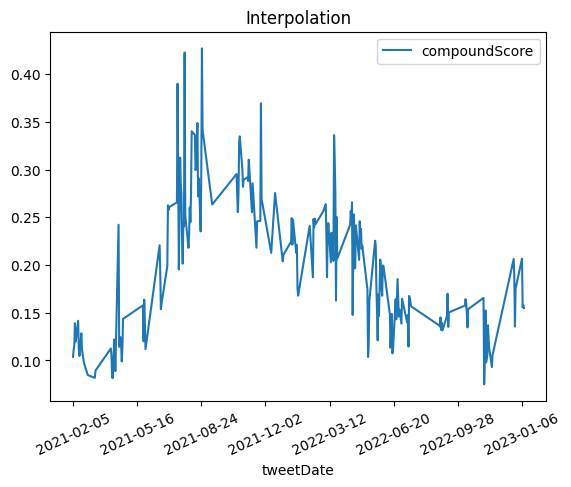

In [ ]:
import matplotlib.pyplot as plt
new_df.plot(x='tweetDate', y='compoundScore', title = "Interpolation")
plt.xticks(rotation=25)
plt.show()

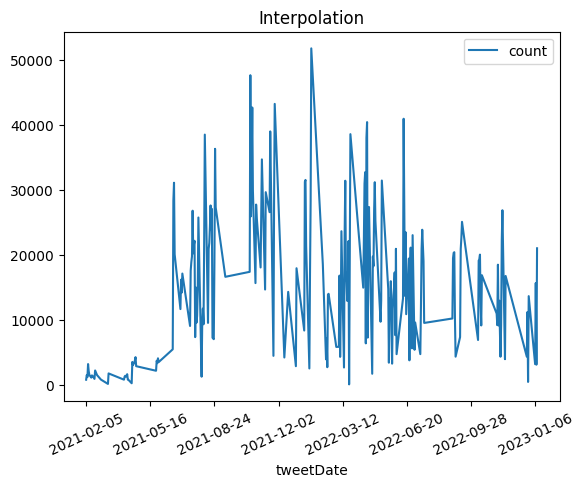

In [ ]:
new_df.plot(x='tweetDate', y='count', title = "Interpolation")
plt.xticks(rotation=25)
plt.show()

In [ ]:
new_df.to_csv('updated_interpolated_sentiment.csv', index=False)

# Average_substitution

In [ ]:
avg_df = pd.read_csv('avgSentiment.csv')
avg_sentiment = avg_df['compoundScore'].mean()
avg_sentiment

0.19752133331539679

In [ ]:
import math
avg_count = math.floor(avg_df['count'].mean())
avg_count

14979

In [ ]:
new_df = pd.DataFrame()
new_df['tweetDate'] = pd.date_range(start='02/05/2021', end='01/09/2023')
new_df['tweetDate'] = new_df['tweetDate'].dt.strftime('%Y-%m-%d')
new_df['compoundScore'] = new_df['tweetDate'].map(avg_df.set_index('tweetDate')['compoundScore'])
new_df['count'] = new_df['tweetDate'].map(avg_df.set_index('tweetDate')['count'])
new_df['count'].fillna(avg_count, inplace=True)
new_df['compoundScore'].fillna(avg_sentiment, inplace=True)
new_df

,tweetDate,compoundScore,count
0,2021-02-05,0.103567,772.0
1,2021-02-06,0.110918,1488.0
2,2021-02-07,0.115992,1169.0
3,2021-02-08,0.138868,3180.0
4,2021-02-09,0.119698,2102.0
...,...,...,...
699,2023-01-05,0.197521,14979.0
700,2023-01-06,0.206539,3165.0
701,2023-01-07,0.155540,15662.0
702,2023-01-08,0.158096,3085.0


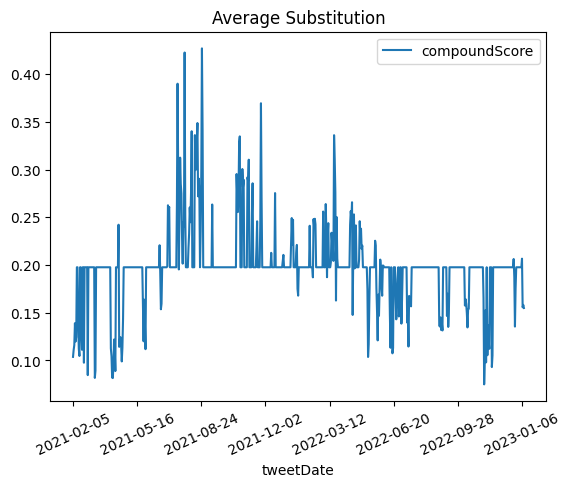

In [ ]:
new_df.plot(x='tweetDate', y='compoundScore', title = "Average Substitution")
plt.xticks(rotation=25)
plt.show()

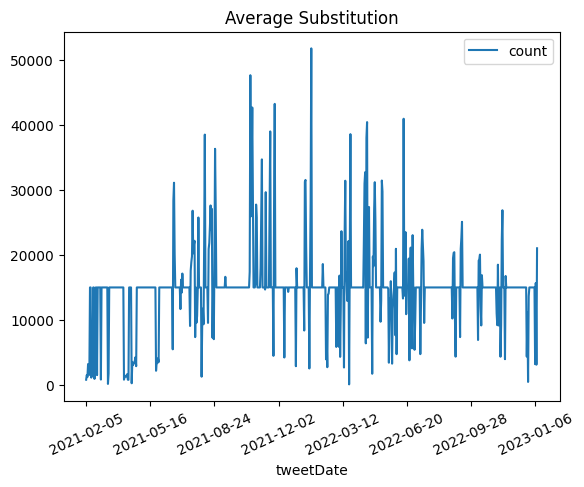

In [ ]:
new_df.plot(x='tweetDate', y='count', title = 'Average Substitution')
plt.xticks(rotation=25)
plt.show()

In [ ]:
new_df.to_csv('avg_substitution_sentiment.csv', index=False)